In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam

In [2]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [3]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target


In [4]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Introducción al Perceptrón Multicapa (MLP)
El Perceptrón Multicapa (MLP) es un tipo de red neuronal artificial que consiste en múltiples capas de neuronas, conectadas de manera que cada neurona de una capa está conectada a todas las neuronas de la siguiente capa. Estas capas son típicamente:

1. **Capa de Entrada:** Recibe las características del conjunto de datos.
2. **Capas Ocultas:** Procesan las características mediante la aplicación de funciones de activación.
3. **Capa de Salida:** Proporciona el resultado final de la red, que puede ser una clasificación, una regresión, etc.

## Arquitectura del MLP

1. **Capa de Entrada:** En nuestro caso, esta capa tendrá 4 neuronas, correspondientes a las 4 características del conjunto de datos Iris.
2. **Capas Ocultas:** Añadiremos dos capas ocultas con 10 neuronas cada una y una función de activación ReLU.
3. **Capa de Salida:** Tendrá 3 neuronas, correspondientes a las 3 clases del conjunto de datos Iris, con una función de activación softmax para la clasificación.

## Función de Activación ReLU
La función de activación ReLU (Rectified Linear Unit) es una de las funciones de activación más utilizadas en las redes neuronales debido a su simplicidad y efectividad. La ecuación de ReLU es:

$$
\text{ReLU}(x) = \max(0, x)
$$

Esto significa que:

- Si $x$ es mayor que 0, ReLU devuelve $x$.
- Si $x$ es menor o igual a 0, ReLU devuelve 0.

## Construcción del Modelo MLP




###  `activation='softmax'`

La función de activación softmax se utiliza comúnmente en la capa de salida de los modelos de clasificación multiclase. Transforma un vector de valores reales en un vector de probabilidades, donde cada valor está entre 0 y 1 y la suma de todos los valores es igual a 1.

La fórmula de la función softmax para un vector de entrada \(z = [z_1, z_2, ..., z_K]\) es:

$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} $$

donde $$  \sigma(z)_j  $$ es la probabilidad predicha para la clase $$ (j).$$

### Propiedades y ventajas de la función softmax:

1. **Probabilidades normalizadas**: La salida de softmax proporciona una distribución de probabilidad sobre las clases posibles, lo que es útil para problemas de clasificación.
2. **Diferenciable**: La función softmax es diferenciable, lo que permite utilizarla en el contexto del entrenamiento de redes neuronales mediante retropropagación.
3. **Interpretabilidad**: Las salidas pueden interpretarse directamente como probabilidades, lo que facilita la interpretación de los resultados del modelo.



In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [6]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


C:\Users\esteb\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Crear el modelo MLP con Dropout + Regularización L2
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa de entrada
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(10, activation='tanh', kernel_regularizer=l2(0.01)))  # Regularización L2 en la capa oculta
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Capa de salida

In [8]:

# Resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

## Compilación del Modelo

Para compilar el modelo, necesitamos especificar el optimizador, la función de pérdida y las métricas de evaluación. Usaremos el optimizador Adam y la función de pérdida `categorical_crossentropy` adecuada para problemas de clasificación multiclase.


### Explicación de `optimizer='adam'`

El optimizador Adam (Adaptive Moment Estimation) es uno de los algoritmos de optimización más utilizados en el entrenamiento de redes neuronales. Combina las ventajas de dos otros algoritmos: AdaGrad y RMSProp.

- **AdaGrad** ajusta la tasa de aprendizaje para cada parámetro individualmente, adaptándose al gradiente de manera que los parámetros con gradientes grandes se actualicen más lentamente y los parámetros con gradientes pequeños se actualicen más rápidamente.
- **RMSProp** adapta la tasa de aprendizaje de cada parámetro basándose en la media móvil del cuadrado de los gradientes, lo que permite manejar de manera eficiente la tasa de aprendizaje en presencia de funciones de pérdida no convexas.

Adam combina estas ideas utilizando estimaciones tanto del primer momento (media) como del segundo momento (varianza) de los gradientes:

1. **Media móvil de los gradientes**: Adam calcula una media móvil exponencial de los gradientes del modelo durante el entrenamiento.
2. **Media móvil del cuadrado de los gradientes**: También calcula una media móvil exponencial del cuadrado de los gradientes.
3. **Corrección de sesgo**: Se aplican correcciones de sesgo para las primeras iteraciones.

La fórmula de actualización para los parámetros es:
$$ \theta_t = \theta_{t-1} - \eta \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon} $$

donde:
- $$ \theta_t $$ son los parámetros en el paso $$ t $$
- $$ \eta $$ es la tasa de aprendizaje
- $$ \hat{m_t} $$ es la media móvil corregida de los gradientes
- $$ \hat{v_t} $$ es la media móvil corregida del cuadrado de los gradientes
- $$ \epsilon $$ es un pequeño valor para evitar la división por cero

Adam es conocido por su eficiencia y robustez en el entrenamiento de redes neuronales profundas.


In [9]:
learning_rate = 0.001  # especifica la tasa de aprendizaje deseada
optimizer = Adam(learning_rate=learning_rate)

In [10]:
# Compilar el modelo
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Entrenamiento del Modelo

Entrenaremos el modelo utilizando los datos de entrenamiento. Especificamos el número de épocas y el tamaño del lote, además de una porción de datos para validación durante el entrenamiento.



In [11]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=200, batch_size=5, validation_split=0.1)


Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2771 - loss: 1.7515 - val_accuracy: 0.4167 - val_loss: 1.3118
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3627 - loss: 1.7441 - val_accuracy: 0.4167 - val_loss: 1.2966
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4134 - loss: 1.6206 - val_accuracy: 0.4167 - val_loss: 1.2918
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4270 - loss: 1.4042 - val_accuracy: 0.4167 - val_loss: 1.2874
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2879 - loss: 1.7356 - val_accuracy: 0.4167 - val_loss: 1.2769
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 1.5144 - val_accuracy: 0.4167 - val_loss: 1.2617
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2649 - loss: 1.7383 - val_accuracy: 0.4167 - val_loss: 1.2487
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4462 - loss: 1.4834 - val_accuracy: 0.4167 - 


## Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [12]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8000 - loss: 0.5062
Precisión en el conjunto de prueba: 80.00%


In [13]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8000 - loss: 0.5062
Precisión en el conjunto de prueba: 80.00%


## Guardar y Cargar el Modelo

Podemos guardar el modelo entrenado para su uso futuro y cargarlo cuando sea necesario.



In [14]:

# Guardar el modelo
model.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_dropout.h5')


## Visualización de Resultados

Visualizamos la precisión y la pérdida durante el entrenamiento para entender mejor el rendimiento del modelo.


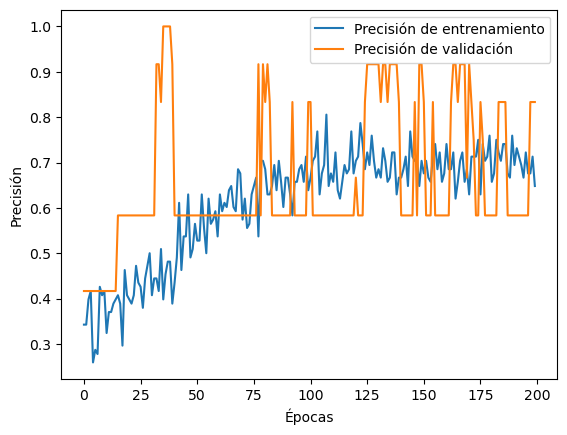

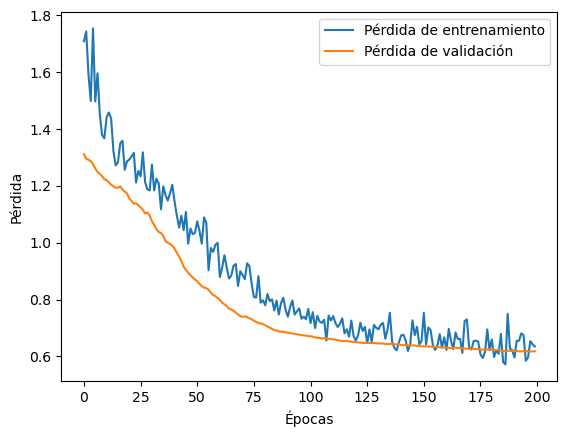

In [15]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


## ACTIVIDAD 1

Para la actividad 1, se agregó la librería "from tensorflow.keras.optimizers import Adam". De otra forma, no dejaba modificar los valorse del modelo. Ya con esto en mente, simplemente cambiamos los valores de learning_rate a los que se indican en la actividad.

#### Resultados con 0.01 de learning_rate:
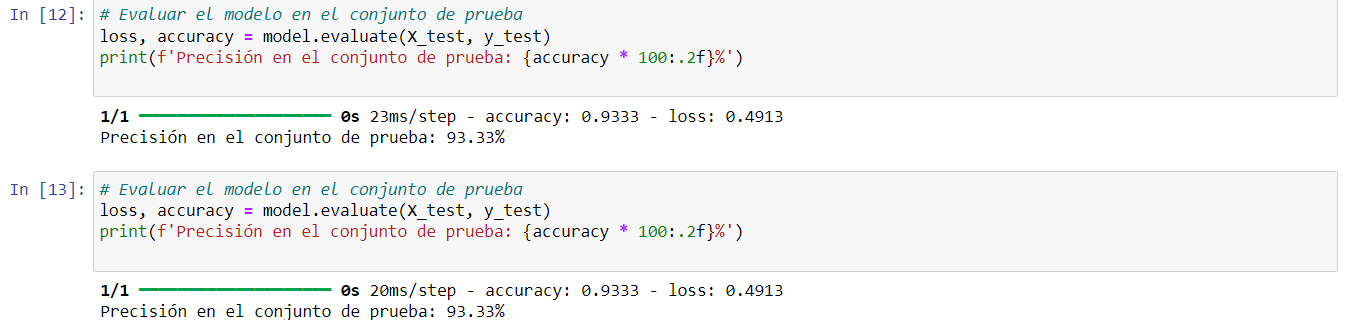
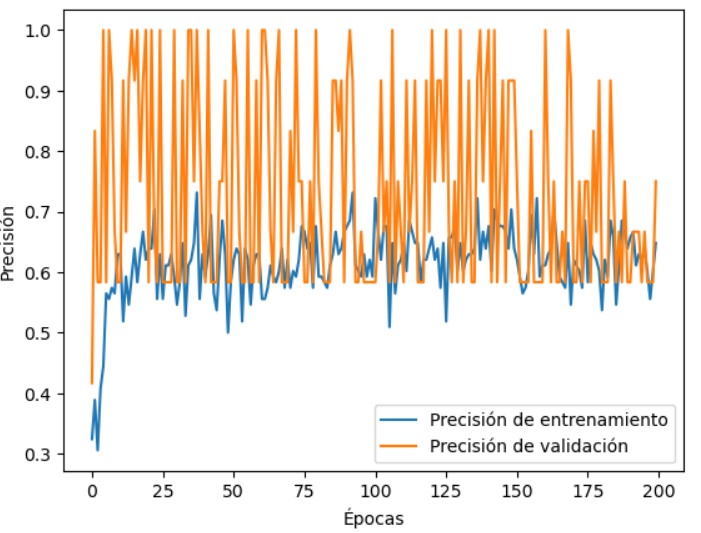
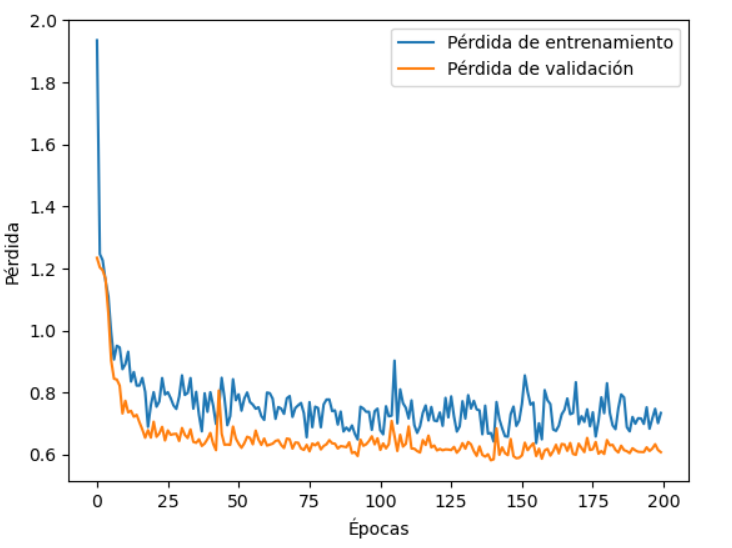

#### Resultados con 0.0001 de learning rate:
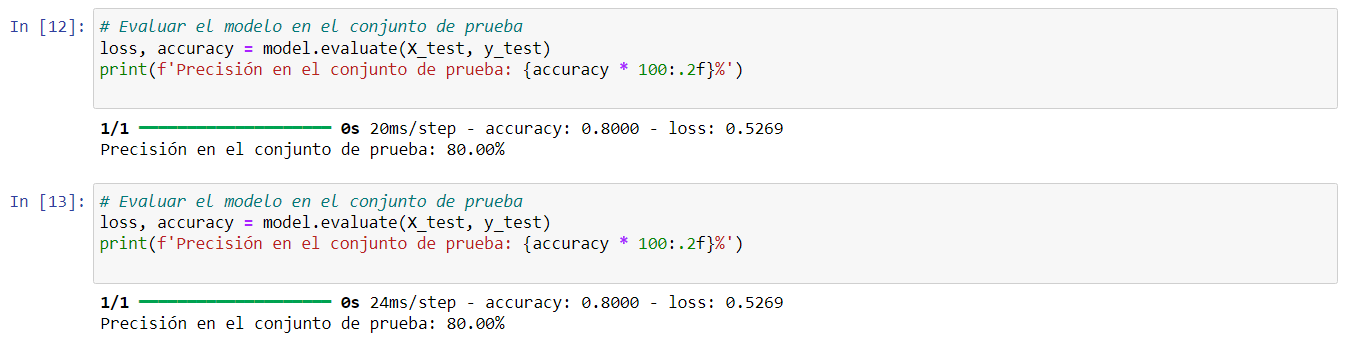
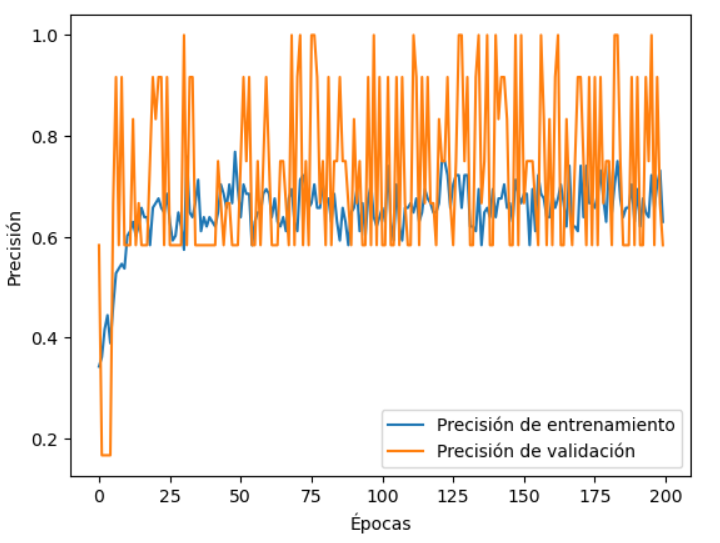
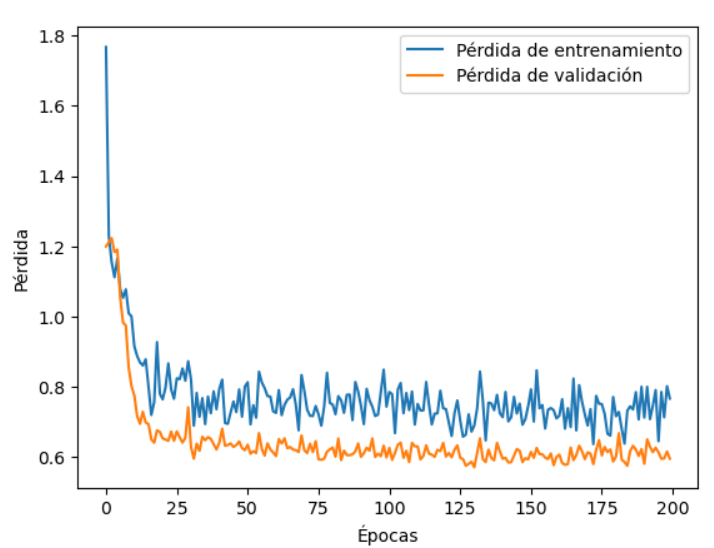

Mi conclusión respecto a los tres valores de la tasa de aprendizaje es que mientras más grande sea, sospechosamente se vuelve más "preciso". Lo que yo creo que ocurre es que tiene menos que analizar, por lo tanto tira resultados idóneos o poco realistas. Mientras que en las tasas como 0.0001, existe una precisión más creíble.

## Actividad 2
En la actividad 2 se pide cambiar el numero de neuronas en el modelo secuencial para las capas ocultas, a 256 y 1024. Para esto solo tenemos que hacer el cambio pertinente en los Dense de las capas ocultas.

#### Resultados con 256 Neuronas:
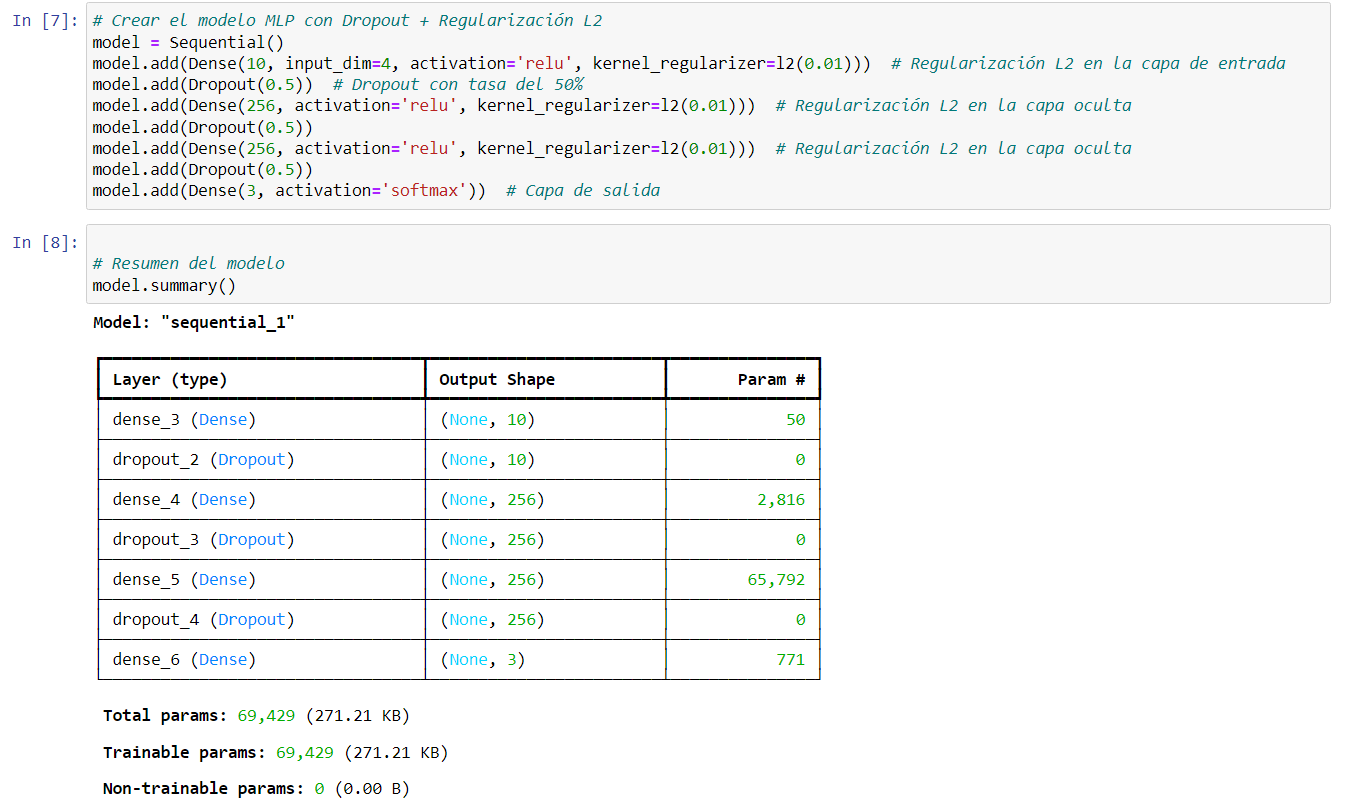

#### Resultados con 1024 Neuronas:
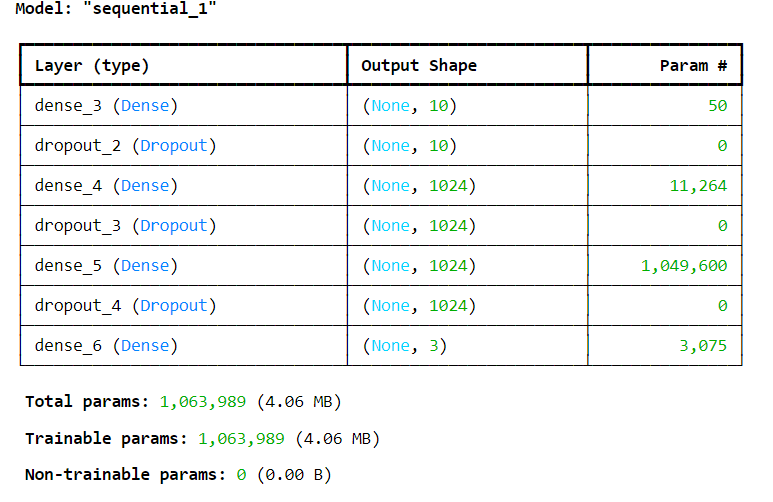

Aumentar el número de neuronas en una capa oculta incrementa significativamente el número de parámetros del modelo, lo que mejora su capacidad de aprendizaje pero también aumenta el riesgo de sobreajuste y el costo computacional, además del tamaño del modelo. Se debe encontrar el balance entre parametro y numero óptimo de neuronas.

## Actividad 3
Se pide cambiar el número de Epochs (épocas) de su estandar actual 20, a 10 y 30 epocas. Siento que esta actividad es futil, ya que he estado entrenando este modelo desde el principio con 200 épocas. Por lo tanto, se hará el mismo experimento pero con 100 y 300 épocas, todo esto con un learning_rate de 0.001 y 10 neuronas en capas ocultas.

#### Resultados con 100 épocas:
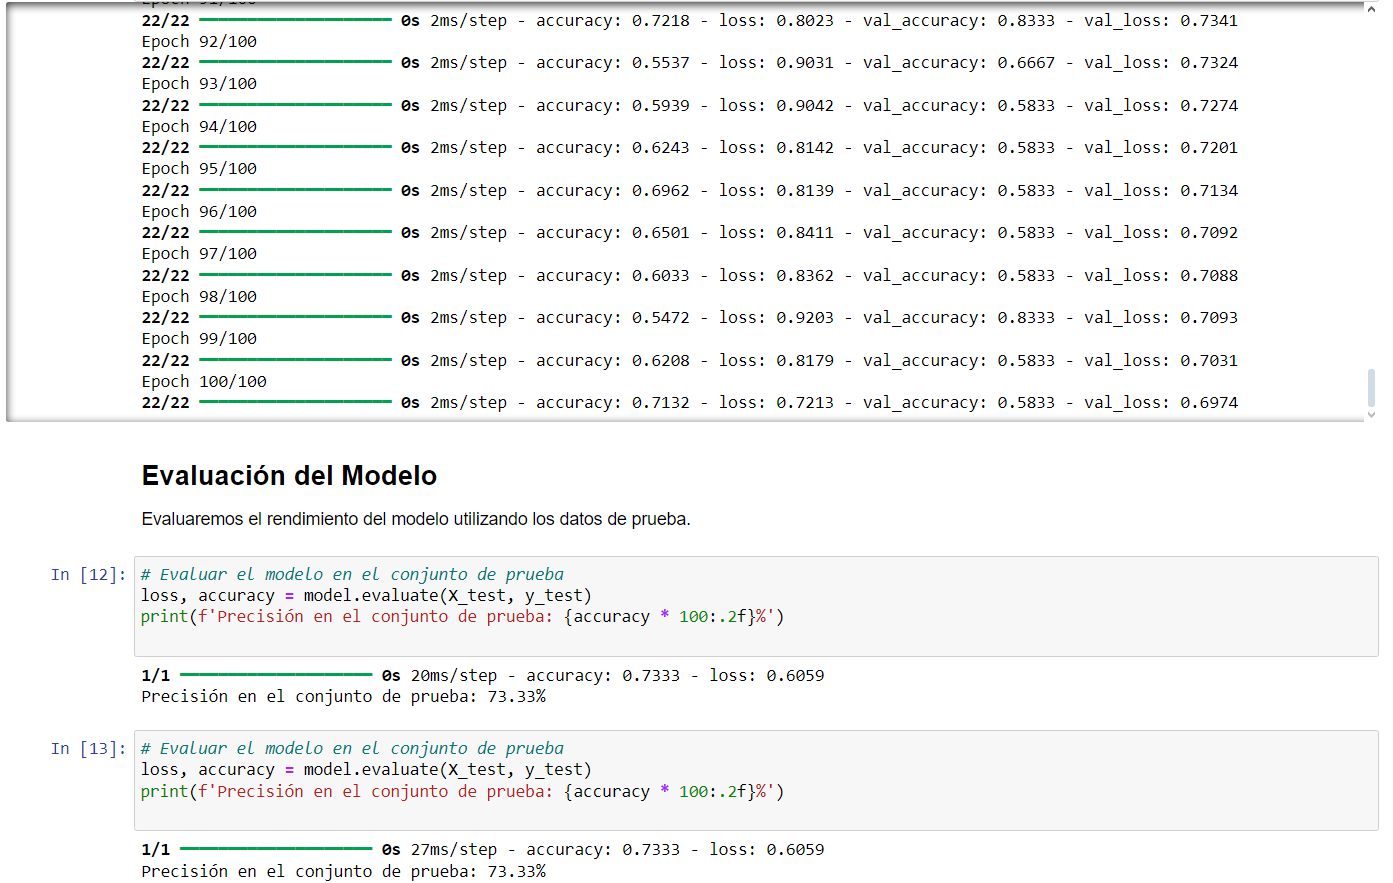
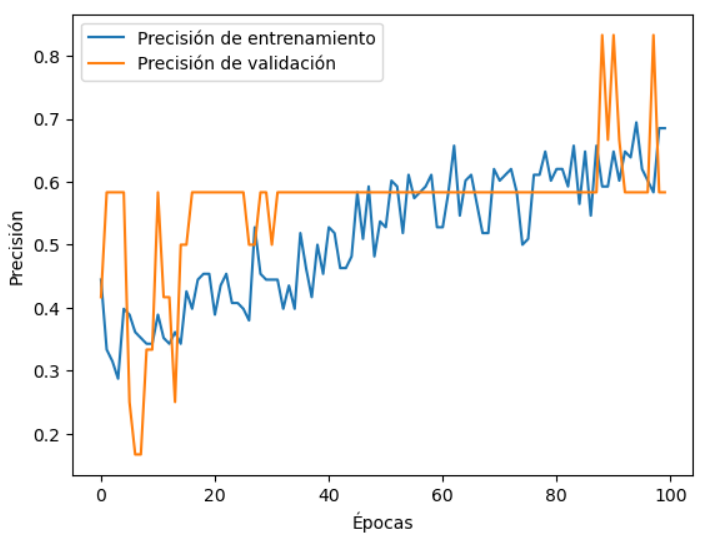
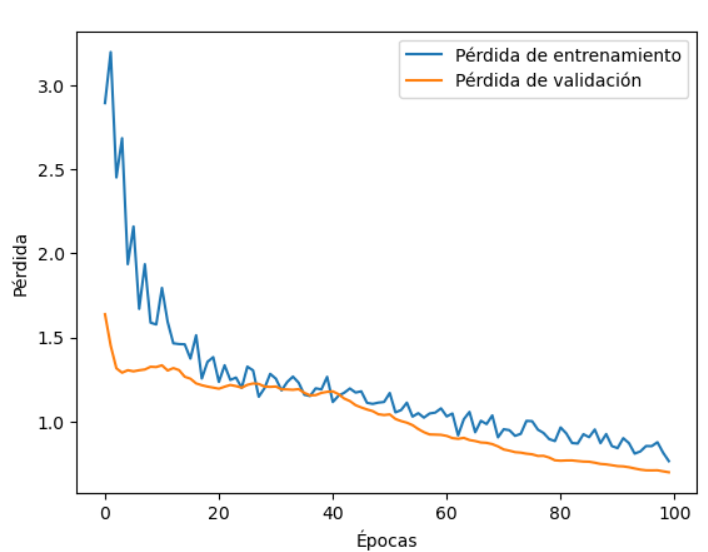

#### Resultados con 300 épocas:
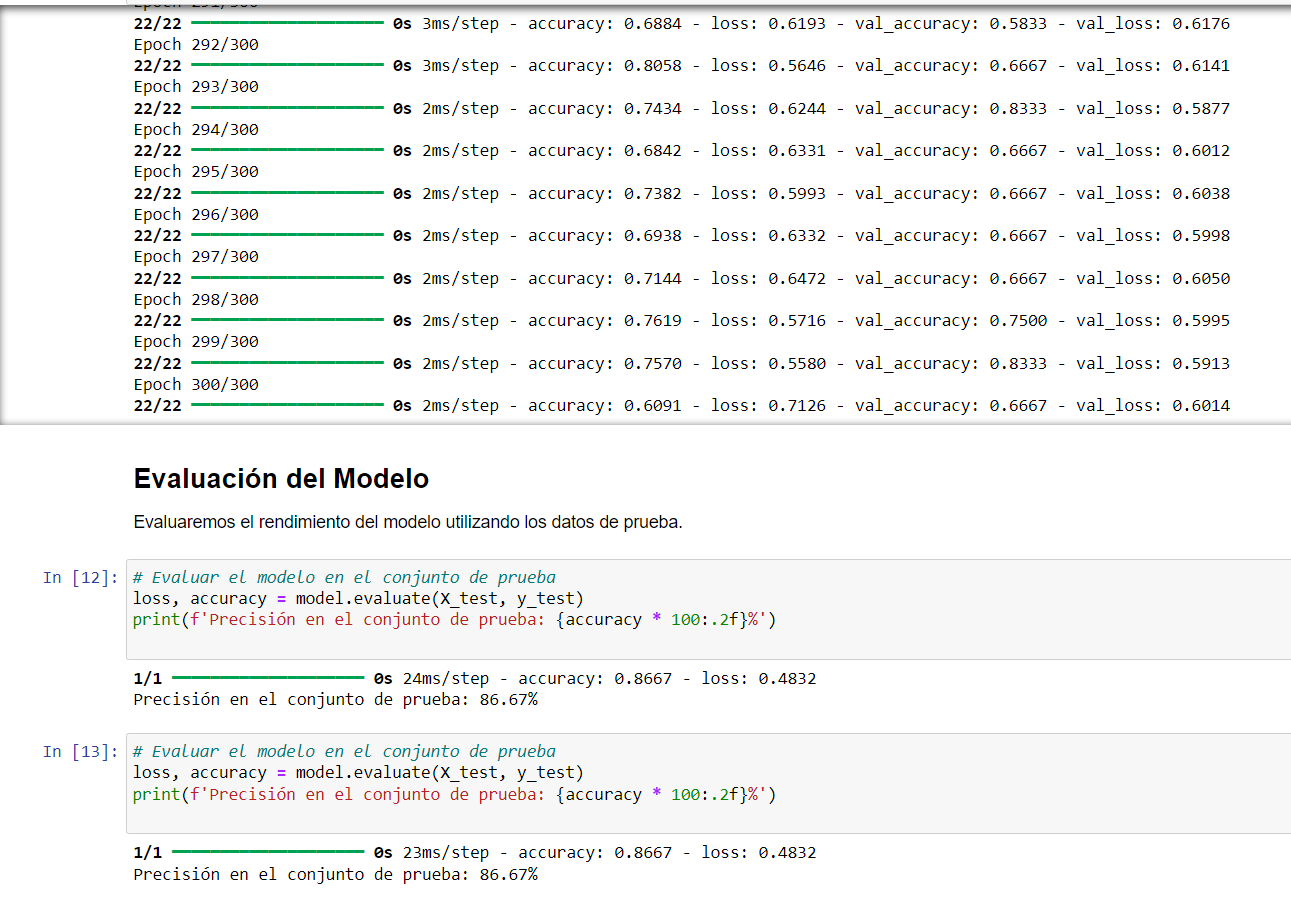
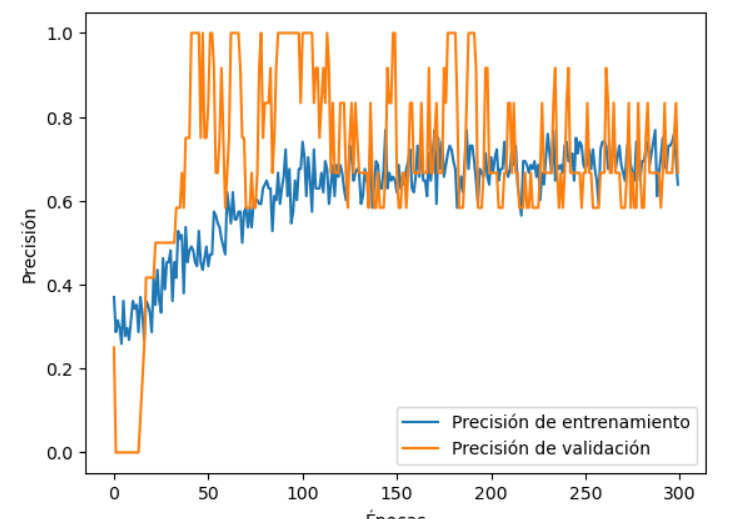
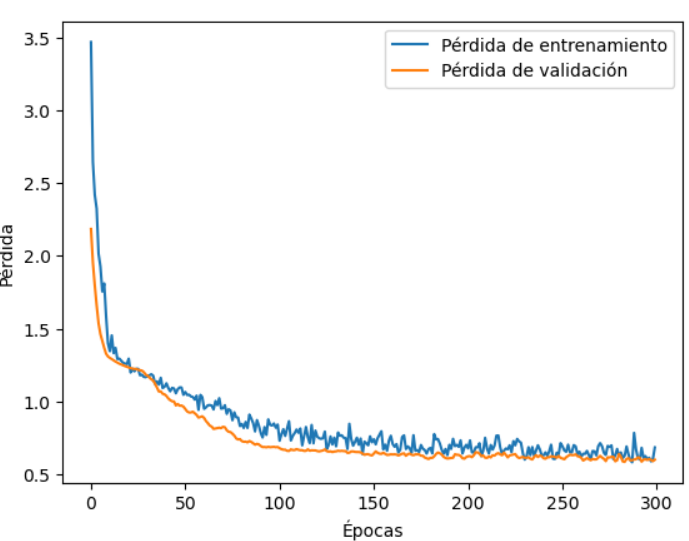

Mientras más epochs existan, más precisión tendrá el modelo final. Pero también se observan signos de subajuste con 100 epochs, y sobreajuste con 300. Se debe encontrar la cantidad de épocas adecuada para el numero de parametros.

## Actividad 4
Se pide modificar la función de activación de ReLU a Sigmoide y Tanh en las capas ocultas.

#### Resultados con Sigmoide:
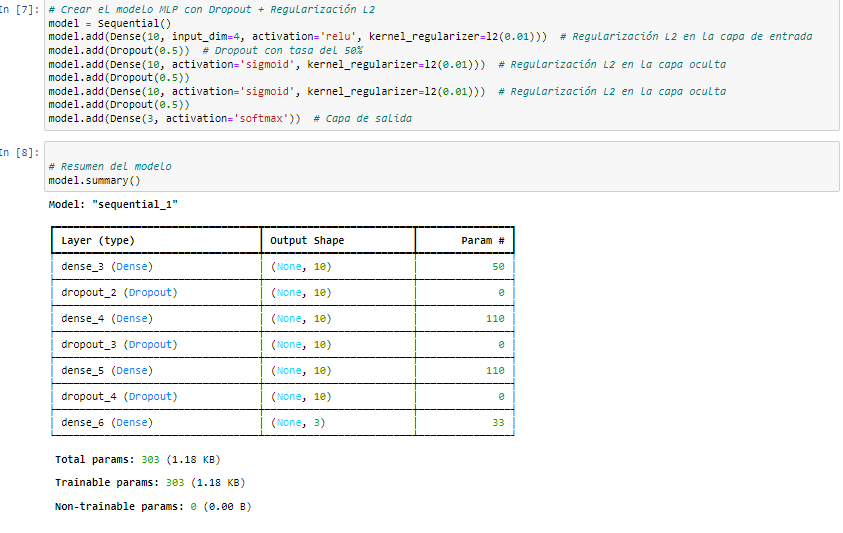
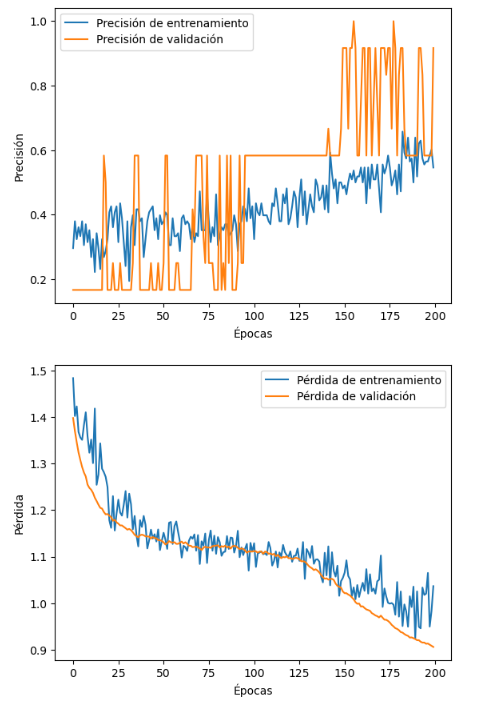

#### Resultados con Tanh
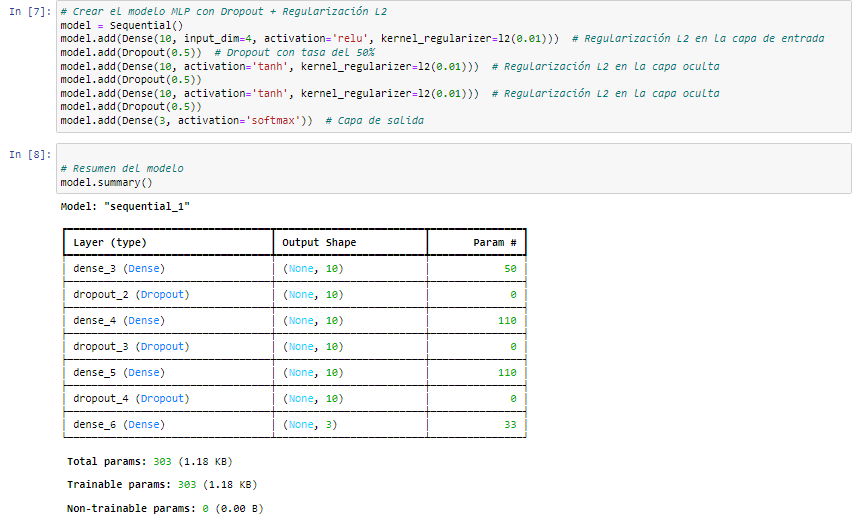
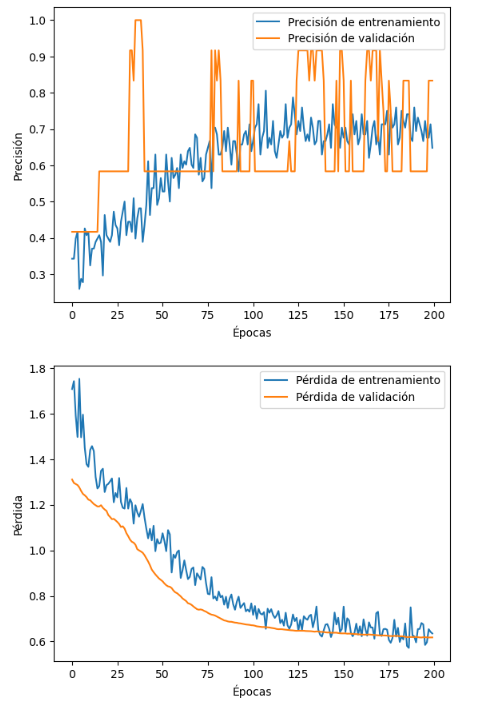


Para la función Sigmoide, existe una considerable volatilidad en las métricas de validación y un comportamiento más estable en entrenamiento. La extrema volatilidad en validación puede indicar problemas de saturación de neuronas debido al uso de la función sigmoide, lo que podría estar causando el gradiente desvaneciente y afectando negativamente la capacidad del modelo para aprender de manera efectiva. Además, las diferencias entre las métricas de entrenamiento y validación sugieren un posible inicio de sobreajuste, especialmente visible en las últimas épocas.

En cambio, para la funcion Tangente Hiperbólica, existe una mejora constante en la precisión de entrenamiento y una disminución continua en la pérdida de entrenamiento, lo cual es positivo. Sin embargo, la precisión y pérdida de validación son más volátiles y generalmente inferiores a las de entrenamiento, indicando problemas de generalización y potencial sobreajuste.

Ambos modelos luchan con la generalización, como lo demuestra la menor precisión y mayor pérdida en validación en comparación con el entrenamiento. Sin embargo, el modelo con tanh parece ofrecer un rendimiento ligeramente más estable en validación que el modelo con sigmoide.